<a href="https://colab.research.google.com/github/elizabethamchugh/Customer-Segmentation-Analysis/blob/main/ElizabethMcHugh_FinalCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Loading**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests # Added for downloading files

os.makedirs("data", exist_ok=True)


In [ ]:
# Color Palette
# -------------------------
palette = ['#1b4562', '#27638c', '#63a0c9', '#b6dcf6', '#d6e9f6']
sns.set_palette(palette)

# Load Dataset
# -------------------------
# Dataset source:
# https://github.com/nailson/ifood-data-business-analyst-test

file_path = "data/ifood_df.csv"

if os.path.exists(file_path):
    ifood = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    display(ifood.head())
else:
    print("Dataset file not found locally. Attempting to download...")
    github_url = "https://raw.githubusercontent.com/nailson/ifood-data-business-analyst-test/master/ifood_df.csv"
    try:
        response = requests.get(github_url)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
        with open(file_path, 'wb') as f:
            f.write(response.content)
        ifood = pd.read_csv(file_path)
        print(f"Dataset downloaded from {github_url} and loaded successfully.")
        display(ifood.head())
    except requests.exceptions.RequestException as e:
        print(f"Failed to download dataset: {e}")
        print("Please ensure you have an active internet connection or manually download the file.")
    except Exception as e:
        print(f"An error occurred after downloading: {e}")
        print("Please check the file content or manual download.")


Dataset loaded successfully.


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
ifood_1 = ifood.copy()

## Column Renaming

---





For clarity and readability, I will rename the columns below:

In [ ]:
ifood_1 = ifood_1.rename(columns={'Income':'Household_Income','Recency':'Days_Since_Purchase', 'marital_Married':'Married', 'marital_Together':'Together', 'marital_Widow':'Widowed', 'marital_Single':'Single', 'marital_Divorced':'Divorced', 'Kidhome':'Number_Kids', 'Teenhome':'Number_Teens', 'MntWines':'AmtWines', 'MntFruits':'AmtFruits', 'MntMeatProducts':'AmtMeatProds', 'MntFishProducts':'AmtFishProds', 'MntSweetProducts':'AmtSweetProds', 'MntGoldProds':'AmtGoldProds', 'MntRegularProds':'AmtRegularProds', 'MntTotal':'Total_Spent', 'education_2n Cycle':'2nCycle', 'education_Basic':'Basic', 'education_Graduation':'Graduated', 'education_Master':'Masters', 'education_PhD':'PhD', 'Customer_Days':'Enrollment_Length'})
ifood_1

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,...,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


## Data Cleaning

---



To clean the data, I will first determine if there are missing values.

In [ ]:
pd.isna(ifood_1)

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,...,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Then, I will count the number of missing values.

In [ ]:
pd.isna(ifood_1).sum()

,0
Household_Income,0
Number_Kids,0
Number_Teens,0
Days_Since_Purchase,0
AmtWines,0
AmtFruits,0
AmtMeatProds,0
AmtFishProds,0
AmtSweetProds,0
AmtGoldProds,0


Although the tables above yield zero missing values, I will run the dropna() function to ensure my data set is clean.

In [ ]:
ifood_1.dropna()

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,...,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


Next, I will drop duplicate values.

In [ ]:
ifood_1.drop_duplicates()

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,...,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5,1,6,3,4,3,...,0,0,0,0,1,0,0,19,16,0
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


Lastly, I will run describe() to verify the dataset is clean.

In [ ]:
ifood_1.describe(include='all')

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,...,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


## Adding Columns

---



To calculate the total number of kids and teens in a household, I will create a new column labeled 'Total_Children' that is the summation of 'Number_Kids' and 'Number_Teens'.

In [ ]:
ifood_2 = ifood_1.copy()
ifood_2['Total_Children'] = (ifood_2['Number_Kids'] + ifood_2['Number_Teens'])
ifood_2

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,...,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall,Total_Children
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,2
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,1,0,0,1094,847,0,1
2201,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,0,0,0,1,436,428,1,3
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,1,0,0,1217,1193,1,0
2203,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,0,0,1,0,782,721,0,1


To determine the average amount a customer spends on all non-gold products, I will create a column for the average spending on 'AmtRegularProds'.

In [ ]:
ifood_3 = ifood_2.copy()
ifood_3['AvgRegularProds'] = ifood_2['AmtRegularProds']/5
ifood_3

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,...,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall,Total_Children,AvgRegularProds
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,0,288.2
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,2,3.0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,0,138.4
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,1,8.6
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,1,78.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,1,0,0,1094,847,0,1,169.4
2201,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,0,0,1,436,428,1,3,85.6
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,1,0,0,1217,1193,1,0,238.6
2203,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,0,1,0,782,721,0,1,144.2


# **Exploratory Data Analysis**

## Method Functions

---




In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
ifood.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
5,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,53,2452,0,0,0,1,0,0,0,0,1,0,702,688,0
6,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,49,2752,1,0,0,0,0,0,0,1,0,0,563,536,0
7,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,35,2576,0,1,0,0,0,0,0,0,0,1,146,123,0
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,46,2547,0,0,0,1,0,0,0,0,0,1,44,42,0
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,70,2267,0,0,0,1,0,0,0,0,0,1,36,23,1


In [ ]:
ifood.tail(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
2195,24434.0,2,0,9,3,2,8,20,0,17,2,2,1,2,7,0,0,0,0,0,0,3,11,0,48,2201,0,1,0,0,0,0,0,1,0,0,33,16,0
2196,11012.0,1,0,82,24,3,26,7,1,23,3,3,1,2,9,1,0,0,0,0,0,3,11,0,36,2629,0,0,1,0,0,0,0,1,0,0,61,38,1
2197,44802.0,0,0,71,853,10,143,13,10,20,2,9,4,12,8,0,0,0,0,0,0,3,11,0,50,2836,0,0,1,0,0,0,0,0,1,0,1029,1009,0
2198,26816.0,0,0,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,3,11,0,34,2840,0,0,1,0,0,0,0,1,0,0,19,16,0
2199,34421.0,1,0,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0,46,2522,0,1,0,0,0,0,0,1,0,0,21,12,0
2200,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0
2204,52869.0,1,1,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1,66,2781,0,1,0,0,0,0,0,0,0,1,151,130,0


In [ ]:
ifood.shape

(2205, 39)

In [ ]:
ifood.describe(include='all')

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


## Number of Customers per Category

---





In [ ]:
ifood_3.sum()

,0
Household_Income,113826719.0
Number_Kids,975.0
Number_Teens,1117.0
Days_Since_Purchase,108065.0
AmtWines,675093.0
AmtFruits,58219.0
AmtMeatProds,364513.0
AmtFishProds,83253.0
AmtSweetProds,59818.0
AmtGoldProds,97146.0


The table above represents the total number of customers in each demographic. 854 customers are married, 568 customers are in a relationship, 477 customers are single, 230 customers are divorced, 76 customers are widowed, 54 customers have a basic-level education, 1113 customers graduated from college, 198 customers completed a second-cycle education, 364 customers have their masters, and 476 customers have a PhD.

Using the describe() function from the data cleaning section, we can determine the average customer age is 51 years old and the average customer income is 51,622 BRL.

In [ ]:
ifood_3.query('AmtWines > 0').sum()

,0
Household_Income,113590542.0
Number_Kids,970.0
Number_Teens,1117.0
Days_Since_Purchase,107318.0
AmtWines,675093.0
AmtFruits,58188.0
AmtMeatProds,364475.0
AmtFishProds,83141.0
AmtSweetProds,59762.0
AmtGoldProds,97040.0


The table above shows the number of customers in each demographic who purchased wine.

In [ ]:
ifood_3.query('AmtFruits > 0').sum()

,0
Household_Income,96384503.0
Number_Kids,726.0
Number_Teens,840.0
Days_Since_Purchase,89737.0
AmtWines,582424.0
AmtFruits,58219.0
AmtMeatProds,339358.0
AmtFishProds,78467.0
AmtSweetProds,56335.0
AmtGoldProds,87841.0


The table above shows the number of customers in each demographic who purchased fruits.

In [ ]:
ifood_3.query('AmtMeatProds > 0').sum()

,0
Household_Income,113815271.0
Number_Kids,975.0
Number_Teens,1117.0
Days_Since_Purchase,108049.0
AmtWines,675093.0
AmtFruits,58219.0
AmtMeatProds,364513.0
AmtFishProds,83247.0
AmtSweetProds,59816.0
AmtGoldProds,97140.0


The table above shows the number of customers in each demographic who purchased meat products.

In [ ]:
ifood_3.query('AmtFishProds > 0').sum()

,0
Household_Income,96759008.0
Number_Kids,731.0
Number_Teens,840.0
Days_Since_Purchase,90445.0
AmtWines,587116.0
AmtFruits,55614.0
AmtMeatProds,341966.0
AmtFishProds,83253.0
AmtSweetProds,57528.0
AmtGoldProds,87929.0


The table above shows the number of customers in each demographic who purchased fish products.

In [ ]:
ifood_3.query('AmtSweetProds > 0').sum()

,0
Household_Income,94993380.0
Number_Kids,720.0
Number_Teens,826.0
Days_Since_Purchase,87752.0
AmtWines,577106.0
AmtFruits,55041.0
AmtMeatProds,335038.0
AmtFishProds,78006.0
AmtSweetProds,59818.0
AmtGoldProds,86038.0


The table above shows the number of customers in each demographic who purchased sweet products.

In [ ]:
ifood_3.query('AmtGoldProds > 0').sum()

,0
Household_Income,110670299.0
Number_Kids,945.0
Number_Teens,1090.0
Days_Since_Purchase,105127.0
AmtWines,655709.0
AmtFruits,57445.0
AmtMeatProds,352824.0
AmtFishProds,82285.0
AmtSweetProds,58870.0
AmtGoldProds,97146.0


The table above shows the number of customers in each demographic who purchased gold products.

In [ ]:
ifood_3.query('AmtRegularProds > 0').sum()

,0
Household_Income,113767840.0
Number_Kids,975.0
Number_Teens,1114.0
Days_Since_Purchase,107878.0
AmtWines,674928.0
AmtFruits,58200.0
AmtMeatProds,364435.0
AmtFishProds,83239.0
AmtSweetProds,59803.0
AmtGoldProds,96255.0


The table above shows the number of customers in each demographic who purchased non-gold products.

In [ ]:
ifood_3.query('Total_Children > 0').sum()

,0
Household_Income,72947425.0
Number_Kids,975.0
Number_Teens,1117.0
Days_Since_Purchase,77348.0
AmtWines,366957.0
AmtFruits,25291.0
AmtMeatProds,133667.0
AmtFishProds,34878.0
AmtSweetProds,26225.0
AmtGoldProds,56716.0


The table above shows the number of customers in each demographic who have at least one child.

In [ ]:
ifood_3.query('AcceptedCmpOverall > 0').sum()

,0
Household_Income,29868781.0
Number_Kids,105.0
Number_Teens,183.0
Days_Since_Purchase,22027.0
AmtWines,280106.0
AmtFruits,16526.0
AmtMeatProds,131244.0
AmtFishProds,25115.0
AmtSweetProds,18261.0
AmtGoldProds,28917.0


The table above shows the number of customers in each demographic who accepted at least one campaign.

## Purchases and Average Spending by Age


---





### Purchases by Age Group

In [ ]:
ifood_3.groupby('Age').agg({'AmtWines':'size'})

,AmtWines
Age,
24,2
25,5
26,3
27,5
28,13
29,15
30,18
31,29
32,29


The table above shows the number of customers in each age group who purchased wine.

In [ ]:
ifood_3.groupby('Age').agg({'AmtFruits':'size'})

,AmtFruits
Age,
24,2
25,5
26,3
27,5
28,13
29,15
30,18
31,29
32,29


The table above shows the number of customers in each age group who purchased fruits.

In [ ]:
ifood_3.groupby('Age').agg({'AmtMeatProds':'size'})

,AmtMeatProds
Age,
24,2
25,5
26,3
27,5
28,13
29,15
30,18
31,29
32,29


The table above shows the number of customers in each age group who purchased meat products.

In [ ]:
ifood_3.groupby('Age').agg({'AmtFishProds':'size'})

,AmtFishProds
Age,
24,2
25,5
26,3
27,5
28,13
29,15
30,18
31,29
32,29


The table above shows the number of customers in each age group who purchased fish products.

In [ ]:
ifood_3.groupby('Age').agg({'AmtSweetProds':'size'})

,AmtSweetProds
Age,
24,2
25,5
26,3
27,5
28,13
29,15
30,18
31,29
32,29


The table above shows the number of customers in each age group who purchased sweet products.

In [ ]:
ifood_3.groupby('Age').agg({'AmtGoldProds':'size'})

,AmtGoldProds
Age,
24,2
25,5
26,3
27,5
28,13
29,15
30,18
31,29
32,29


The table above shows the number of customers in each age group who purchased gold products.

In [ ]:
ifood_3.groupby('Age').agg({'AmtRegularProds':'size'})

,AmtRegularProds
Age,
24,2
25,5
26,3
27,5
28,13
29,15
30,18
31,29
32,29


The table above shows the number of customers in each age group who purchased non-gold products.

### Average Spending by Product Category

In [ ]:
ifood_3.groupby('Age').agg({'Total_Spent':'mean'})

,Total_Spent
Age,
24,40.000000
25,731.000000
26,1422.666667
27,1045.400000
28,639.000000
29,1030.600000
30,491.166667
31,391.310345
32,675.034483


The table above shows the average spending on wine by age group.

In [ ]:
ifood_3.groupby('Age').agg({'AmtWines':'mean'})

,AmtWines
Age,
24,1.500000
25,284.200000
26,659.000000
27,391.200000
28,253.000000
29,549.200000
30,190.833333
31,185.379310
32,301.448276


The table above shows the average spending on wine by age group.

In [ ]:
ifood_3.groupby('Age').agg({'AmtFruits':'mean'})

,AmtFruits
Age,
24,9.000000
25,19.800000
26,33.333333
27,86.400000
28,34.153846
29,41.333333
30,35.944444
31,20.206897
32,43.275862


The table above shows the average spending on fruits by age group.

In [ ]:
ifood_3.groupby('Age').agg({'AmtMeatProds':'mean'})

,AmtMeatProds
Age,
24,8.000000
25,323.000000
26,592.000000
27,344.000000
28,282.615385
29,340.733333
30,213.333333
31,131.172414
32,243.448276


The table above shows the average spending on meat products by age group.

In [ ]:
ifood_3.groupby('Age').agg({'AmtFishProds':'mean'})

,AmtFishProds
Age,
24,9.000000
25,50.400000
26,112.000000
27,160.000000
28,36.615385
29,54.200000
30,30.555556
31,34.068966
32,44.793103


The table above shows the average spending on fish products by age group.

In [ ]:
ifood_3.groupby('Age').agg({'AmtSweetProds':'mean'})

,AmtSweetProds
Age,
24,12.500000
25,53.600000
26,26.333333
27,63.800000
28,32.615385
29,45.133333
30,20.500000
31,20.482759
32,42.068966


The table above shows the average spending on sweet products by age group.

In [ ]:
ifood_3.groupby('Age').agg({'AmtGoldProds':'mean'})

,AmtGoldProds
Age,
24,29.000000
25,30.200000
26,34.666667
27,145.800000
28,46.538462
29,81.733333
30,40.833333
31,35.379310
32,45.034483


The table above shows the average spending on gold products by age group.

In [ ]:
ifood_3.groupby('Age').agg({'AmtRegularProds':'mean'})

,AmtRegularProds
Age,
24,11.000000
25,700.800000
26,1388.000000
27,899.600000
28,592.461538
29,948.866667
30,450.333333
31,355.931034
32,630.000000


The table above shows the average spending on non-gold products by age group.

## Purchases and Average Spending by Marital Status

---






### Number of Customers who Spend More than Average

In [ ]:
ifood_3['Total_Spent'].mean()

np.float64(562.7646258503402)

In [ ]:
ifood_3.query('Married == 1 & Total_Spent > 562.764626')

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Enrollment_Length,Divorced,Married,Single,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall,Total_Children,AvgRegularProds
17,76995.0,0,1,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0,71,2617,0,1,0,0,0,0,0,0,1,0,1606,1430,1,1,286.0
20,2447.0,1,0,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0,41,2698,0,1,0,0,0,0,0,1,0,0,1729,1728,0,1,345.6
21,58607.0,0,1,63,867,0,86,0,0,19,3,2,3,9,8,0,1,0,0,0,0,3,11,0,71,2712,0,1,0,0,0,0,0,0,0,1,953,934,1,1,186.8
27,84618.0,0,0,96,684,100,801,21,66,0,1,6,9,10,2,0,0,1,0,0,0,3,11,0,55,2378,0,1,0,0,0,0,0,0,0,1,1672,1672,1,0,334.4
32,68657.0,0,0,4,482,34,471,119,68,22,1,3,5,9,7,0,0,0,0,0,0,3,11,0,74,2653,0,1,0,0,0,0,0,0,1,0,1174,1152,0,0,230.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161,73803.0,0,1,61,833,80,363,52,26,174,2,9,5,6,6,1,0,0,0,0,0,3,11,1,63,2856,0,1,0,0,0,0,0,1,0,0,1354,1180,1,1,236.0
2170,73807.0,0,1,88,366,124,156,71,78,54,2,5,5,11,2,0,0,0,0,0,0,3,11,0,42,2702,0,1,0,0,0,0,0,1,0,0,795,741,0,1,148.2
2173,61014.0,0,1,17,269,129,495,182,43,29,4,9,3,4,7,0,0,0,0,0,0,3,11,0,40,2846,0,1,0,0,0,0,0,1,0,0,1118,1089,0,1,217.8
2193,63777.0,1,1,87,457,5,106,15,17,53,8,11,1,6,8,0,0,0,0,0,0,3,11,0,41,2621,0,1,0,0,0,0,0,1,0,0,600,547,0,2,109.4


The table above displays the information for married customers who spend more than average (562.77 BRL) on iFood. In total, 329 married customers spend more than average.

---



In [ ]:
ifood_3.query('Together == 1 & Total_Spent > 562.764626')

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Enrollment_Length,Divorced,Married,Single,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall,Total_Children,AvgRegularProds
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,0,138.4
5,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,53,2452,0,0,0,1,0,0,0,0,1,0,702,688,0,1,137.6
51,82384.0,0,0,55,984,51,432,180,120,190,1,3,10,13,1,0,0,1,0,0,0,3,11,1,65,2746,0,0,0,1,0,0,0,0,1,0,1767,1577,1,0,315.4
56,66653.0,1,1,18,452,18,102,16,18,6,4,4,2,12,3,0,0,0,0,0,0,3,11,0,45,2819,0,0,0,1,0,0,0,1,0,0,606,600,0,2,120.0
59,70666.0,0,0,29,398,40,367,119,122,30,1,7,4,4,4,0,0,0,0,0,0,3,11,0,72,2364,0,0,0,1,0,0,0,1,0,0,1046,1016,0,0,203.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,65220.0,0,0,3,890,63,292,0,25,12,4,8,4,7,6,0,0,0,0,0,0,3,11,1,55,2823,0,0,0,1,0,0,0,0,0,1,1270,1258,0,0,251.6
2139,60934.0,0,1,41,224,155,155,192,93,54,2,6,4,11,4,0,0,0,0,0,0,3,11,0,45,2322,0,0,0,1,0,0,0,1,0,0,819,765,0,1,153.0
2155,65487.0,0,0,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0,63,2329,0,0,0,1,0,0,0,0,1,0,1006,843,0,0,168.6
2178,88325.0,0,0,42,519,71,860,93,27,53,1,6,2,9,2,0,0,0,0,0,0,3,11,0,39,2303,0,0,0,1,0,0,0,1,0,0,1570,1517,0,0,303.4


The table above displays the information for customers in a relationship who spend more than average (562.77 BRL) on iFood. In total, 227 customers in a relationship spend more than average.

---



In [ ]:
ifood_3.query('Single == 1 & Total_Spent > 562.764626')

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Enrollment_Length,Divorced,Married,Single,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall,Total_Children,AvgRegularProds
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,0,288.2
14,82800.0,0,0,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,3,11,1,74,2741,0,0,1,0,0,0,0,0,0,1,1270,1225,2,0,245.0
42,79941.0,0,0,72,123,164,266,227,30,174,1,2,4,9,1,0,0,0,0,0,0,3,11,0,44,2160,0,0,1,0,0,0,0,1,0,0,810,636,0,0,127.2
55,75777.0,0,0,12,712,26,538,69,13,80,1,3,6,11,1,0,1,1,0,0,0,3,11,1,38,2519,0,0,1,0,0,0,0,0,1,0,1358,1278,2,0,255.6
57,61823.0,0,1,26,523,7,134,37,14,169,4,8,2,10,7,0,0,0,0,0,0,3,11,0,68,2655,0,0,1,0,0,0,0,1,0,0,715,546,0,1,109.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,57731.0,0,1,0,266,21,300,65,8,44,4,8,8,6,6,0,0,0,0,0,0,3,11,0,51,2742,0,0,1,0,0,0,0,1,0,0,660,616,0,1,123.2
2180,80617.0,0,0,42,594,51,631,72,55,32,1,4,6,8,2,0,0,0,0,0,0,3,11,0,25,2784,0,0,1,0,0,1,0,0,0,0,1403,1371,0,0,274.2
2188,75777.0,0,0,12,712,26,538,69,13,80,1,3,6,11,1,0,1,1,0,0,0,3,11,1,38,2519,0,0,1,0,0,0,0,0,1,0,1358,1278,2,0,255.6
2191,57642.0,0,1,24,580,6,58,8,0,27,3,7,6,6,4,1,0,0,0,0,0,3,11,0,50,2330,0,0,1,0,0,0,0,0,0,1,652,625,1,1,125.0


The table above displays the information for single customers who spend more than average (562.77 BRL) on iFood. In total, 187 single customers spend more than average.

---



In [ ]:
ifood_3.query('Divorced == 1 & Total_Spent > 562.764626')

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Enrollment_Length,Divorced,Married,Single,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall,Total_Children,AvgRegularProds
6,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,49,2752,1,0,0,0,0,0,0,1,0,0,563,536,0,1,107.2
11,63033.0,0,0,82,194,61,480,225,112,30,1,3,4,8,2,0,0,0,0,0,0,3,11,0,61,2385,1,0,0,0,0,0,0,1,0,0,1072,1042,0,0,208.4
37,48948.0,0,0,53,437,8,206,160,49,42,2,7,10,5,6,1,0,0,0,0,0,3,11,1,77,2672,1,0,0,0,0,0,0,0,0,1,860,818,1,0,163.6
49,82582.0,0,0,54,510,120,550,156,40,241,1,4,9,7,1,1,0,0,1,0,0,3,11,1,43,2181,1,0,0,0,0,0,0,1,0,0,1376,1135,2,0,227.0
52,70287.0,0,0,30,295,35,482,121,120,40,1,5,5,10,3,0,0,0,0,0,0,3,11,1,54,2612,1,0,0,0,0,0,0,1,0,0,1053,1013,0,0,202.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,70179.0,0,1,10,532,88,168,69,44,133,3,7,3,13,5,0,0,0,0,0,0,3,11,0,44,2502,1,0,0,0,0,0,0,0,0,1,901,768,0,1,153.6
2133,72071.0,0,1,4,531,69,300,150,138,150,3,5,4,8,2,0,0,0,0,0,0,3,11,0,66,2659,1,0,0,0,0,0,0,1,0,0,1188,1038,0,1,207.6
2138,65706.0,0,0,77,918,10,129,13,0,129,1,11,3,12,7,0,1,1,0,1,0,3,11,1,50,2525,1,0,0,0,0,1,0,0,0,0,1070,941,3,0,188.2
2143,81380.0,0,0,51,741,68,689,224,68,103,1,4,2,10,2,0,0,0,0,0,0,3,11,0,53,2713,1,0,0,0,0,0,0,0,1,0,1790,1687,0,0,337.4


The table above displays the information for divorced customers who spend more than average (562.77 BRL) on iFood. In total, 102 divorced customers spend more than average.

---



In [ ]:
ifood_3.query('Widowed == 1 & Total_Spent > 562.764626')

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Enrollment_Length,Divorced,Married,Single,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall,Total_Children,AvgRegularProds
58,67680.0,0,1,8,546,0,48,0,6,6,1,7,3,8,5,0,0,0,0,0,0,3,11,0,69,2542,0,0,0,0,1,0,0,0,0,1,600,594,0,1,118.8
226,73455.0,0,0,98,901,61,757,186,163,20,1,6,5,10,3,0,1,0,0,0,0,3,11,0,52,2403,0,0,0,0,1,0,0,1,0,0,2068,2048,1,0,409.6
274,79946.0,0,0,19,395,183,565,166,141,28,1,5,11,5,3,0,0,0,0,0,0,3,11,0,54,2207,0,0,0,0,1,0,0,1,0,0,1450,1422,0,0,284.4
344,62187.0,0,1,38,512,0,83,0,0,41,3,6,2,10,4,0,0,0,0,0,0,3,11,0,51,2258,0,0,0,0,1,0,0,0,0,1,595,554,0,1,110.8
444,70165.0,0,0,60,161,0,253,199,191,122,1,3,7,11,1,0,0,0,0,0,0,3,11,0,71,2439,0,0,0,0,1,0,0,1,0,0,804,682,0,0,136.4
488,53653.0,0,0,29,815,10,239,28,10,108,2,10,4,12,6,0,0,0,0,0,0,3,11,0,67,2758,0,0,0,0,1,0,0,1,0,0,1102,994,0,0,198.8
529,85620.0,0,0,68,416,46,925,60,107,46,1,3,6,4,1,0,0,0,0,0,0,3,11,1,56,2332,0,0,0,0,1,0,0,1,0,0,1554,1508,0,0,301.6
569,79800.0,0,0,65,1060,21,530,32,0,224,1,5,11,5,3,1,0,1,1,0,0,3,11,1,65,2803,0,0,0,0,1,0,0,1,0,0,1643,1419,3,0,283.8
604,72298.0,0,0,52,625,35,169,58,17,35,1,4,3,6,1,0,1,1,0,0,0,3,11,0,71,2270,0,0,0,0,1,0,0,1,0,0,904,869,2,0,173.8
643,58330.0,0,1,87,445,53,213,104,98,151,1,6,4,13,4,0,0,0,0,0,0,3,11,0,45,2345,0,0,0,0,1,0,0,1,0,0,913,762,0,1,152.4


The table above displays the information for widowed customers who spend more than average (562.77 BRL) on iFood. In total, 39 widowed customers spend more than average.

---



### Average Spending on Wine

In [ ]:
ifood_3.groupby('Married').agg({'AmtWines': 'mean'})

,AmtWines
Married,
0,309.544041
1,300.818501


Married customers spend 300.82 BRL on wine, on average.

---



In [ ]:
ifood_3.groupby('Together').agg({'AmtWines': 'mean'})

,AmtWines
Together,
0,304.989004
1,309.552817


Customers in a relationship spend 309.55 BRL on wine, on average.

---



In [ ]:
ifood_3.groupby('Single').agg({'AmtWines': 'mean'})

,AmtWines
Single,
0,310.170718
1,291.651992


Single customers spend 291.65 BRL on wine, on average.

---



In [ ]:
ifood_3.groupby('Divorced').agg({'AmtWines': 'mean'})

,AmtWines
Divorced,
0,303.668354
1,327.600000


Divorced customers spend 327.60 BRL on wine, on average.

---



In [ ]:
ifood_3.groupby('Widowed').agg({'AmtWines': 'mean'})

,AmtWines
Widowed,
0,303.988257
1,367.131579


Widowed customers spend 367.13 BRL on wine, on average.

---



### Average Spending on Fruits

In [ ]:
ifood_3.groupby('Married').agg({'AmtFruits': 'mean'})

,AmtFruits
Married,
0,26.837158
1,25.716628


Married customers spend 25.72 BRL on fruits, on average.

---



In [ ]:
ifood_3.groupby('Together').agg({'AmtFruits': 'mean'})

,AmtFruits
Together,
0,26.736103
1,25.443662


Customers in a relationship spend 25.44 BRL on fruits, on average.

---



In [ ]:
ifood_3.groupby('Single').agg({'AmtFruits': 'mean'})

,AmtFruits
Single,
0,26.152778
1,27.310273


Single customers spend 27.31 BRL on fruits, on average.

---



In [ ]:
ifood_3.groupby('Divorced').agg({'AmtFruits': 'mean'})

,AmtFruits
Divorced,
0,26.259747
1,27.634783


Divorced customers spend 27.63 BRL on fruits, on average.

---



In [ ]:
ifood_3.groupby('Widowed').agg({'AmtFruits': 'mean'})

,AmtFruits
Widowed,
0,26.208079
1,31.868421


Widowed customers spend 31.87 BRL on fruits, on average.

---



### Average Spending on Meat Products


In [ ]:
ifood_3.groupby('Married').agg({'AmtMeatProds': 'mean'})

,AmtMeatProds
Married,
0,170.119171
1,157.707260


Married customers spend 157.71 BRL on meat products, on average.

---



In [ ]:
ifood_3.groupby('Together').agg({'AmtMeatProds': 'mean'})

,AmtMeatProds
Together,
0,165.833232
1,163.809859


Customers in a relationship spend 163.81 BRL on meat products, on average.

---



In [ ]:
ifood_3.groupby('Single').agg({'AmtMeatProds': 'mean'})

,AmtMeatProds
Single,
0,160.098380
1,184.199161


Single customers spend 184.20 BRL on meat products, on average.

---



In [ ]:
ifood_3.groupby('Divorced').agg({'AmtMeatProds': 'mean'})

,AmtMeatProds
Divorced,
0,166.923544
1,151.473913


Divorced customers spend 151.47 BRL on meat products, on average.

---



In [ ]:
ifood_3.groupby('Widowed').agg({'AmtMeatProds': 'mean'})

,AmtMeatProds
Widowed,
0,164.597464
1,185.328947


Widowed customers spend 185.33 BRL on meat products, on average.

---



### Average Spending on Fish Products

In [ ]:
ifood_3.groupby('Married').agg({'AmtFishProds': 'mean'})

,AmtFishProds
Married,
0,39.139156
1,35.569087


Married customers spend 35.37 BRL on fish products, on average.

---



In [ ]:
ifood_3.groupby('Together').agg({'AmtFishProds': 'mean'})

,AmtFishProds
Together,
0,37.255956
1,39.198944


Customers in a relationship spend 39.20 BRL on fish products, on average.

---



In [ ]:
ifood_3.groupby('Single').agg({'AmtFishProds': 'mean'})

,AmtFishProds
Single,
0,37.358796
1,39.197065


Single customers spend 39.20 BRL on fish products, on average.

---



In [ ]:
ifood_3.groupby('Divorced').agg({'AmtFishProds': 'mean'})

,AmtFishProds
Divorced,
0,38.041013
1,35.313043


Divorced customers spend 35.31 BRL on fish products, on average.

---



In [ ]:
ifood_3.groupby('Widowed').agg({'AmtFishProds': 'mean'})

,AmtFishProds
Widowed,
0,37.322687
1,49.907895


Widowed customers spend 49.91 BRL on fish products, on average.

---



### Average Spending on Sweet Products


In [ ]:
ifood_3.groupby('Married').agg({'AmtSweetProds': 'mean'})

,AmtSweetProds
Married,
0,27.311621
1,26.838407


Married customers spend 26.84 BRL on sweet products, on average.

---



In [ ]:
ifood_3.groupby('Together').agg({'AmtSweetProds': 'mean'})

,AmtSweetProds
Together,
0,27.400122
1,26.345070


Customers in a relationship spend 26.35 BRL on sweet products, on average.

---



In [ ]:
ifood_3.groupby('Single').agg({'AmtSweetProds': 'mean'})

,AmtSweetProds
Single,
0,27.186921
1,26.916143


Single customers spend 26.92 BRL on sweet products, on average.

---



In [ ]:
ifood_3.groupby('Divorced').agg({'AmtSweetProds': 'mean'})

,AmtSweetProds
Divorced,
0,27.139747
1,27.030435


Divorced customers spend 27.03 BRL on sweet products, on average.

---



In [ ]:
ifood_3.groupby('Widowed').agg({'AmtSweetProds': 'mean'})

,AmtSweetProds
Widowed,
0,26.744951
1,37.868421


Widowed customers spend 37.87 BRL on sweet products, on average.

---



### Average Spending on Gold Products



In [ ]:
ifood_3.groupby('Married').agg({'AmtGoldProds': 'mean'})

,AmtGoldProds
Married,
0,44.732050
1,42.989461


Married customers spend 42.99 BRL on gold products, on average.

---



In [ ]:
ifood_3.groupby('Together').agg({'AmtGoldProds': 'mean'})

,AmtGoldProds
Together,
0,44.373244
1,43.146127


Customers in a relationship spend 43.15 BRL on gold products, on average.

---



In [ ]:
ifood_3.groupby('Single').agg({'AmtGoldProds': 'mean'})

,AmtGoldProds
Single,
0,44.084491
1,43.958071


Single customers spend 43.96 BRL on gold products, on average.

---



In [ ]:
ifood_3.groupby('Divorced').agg({'AmtGoldProds': 'mean'})

,AmtGoldProds
Divorced,
0,43.763544
1,46.578261


Divorced customers spend 46.58 BRL on gold products, on average.

---



In [ ]:
ifood_3.groupby('Widowed').agg({'AmtGoldProds': 'mean'})

,AmtGoldProds
Widowed,
0,43.635979
1,55.855263


Widowed customers spend 55.86 BRL on gold products, on average.

---



### Average Spending on Regular (Non-Gold) Products

In [ ]:
ifood_3.groupby('Married').agg({'AmtRegularProds': 'mean'})

,AmtRegularProds
Married,
0,528.219097
1,503.660422


Married customers spend 503.660 BRL on regular products, on average.

---



In [ ]:
ifood_3.groupby('Together').agg({'AmtRegularProds': 'mean'})

,AmtRegularProds
Together,
0,517.841173
1,521.204225


Customers in a relationship spend 521.20 BRL on regular products, on average.

---



In [ ]:
ifood_3.groupby('Single').agg({'AmtRegularProds': 'mean'})

,AmtRegularProds
Single,
0,516.883102
1,525.316562


Single customers spend 525.32 BRL on regular products, on average.

---



In [ ]:
ifood_3.groupby('Divorced').agg({'AmtRegularProds': 'mean'})

,AmtRegularProds
Divorced,
0,518.268861
1,522.473913


Divorced customers spend 522.47 on regular products, on average.

---



In [ ]:
ifood_3.groupby('Widowed').agg({'AmtRegularProds': 'mean'})

,AmtRegularProds
Widowed,
0,515.225458
1,616.250000


Widowed customers spend 616.25 BRL on regular products, on average.

---



## Purchases and Average Spending By Education Level

---





### Average Spending on Wine



In [ ]:
ifood_3.groupby('Basic').agg({'AmtWines':'mean'})

,AmtWines
Basic,
0,313.668991
1,7.240741


Customers with a basic-level education spend 7.24 BRL on wine, on average.

---



In [ ]:
ifood_3.groupby('Graduated').agg({'AmtWines':'mean'})

,AmtWines
Graduated,
0,326.916667
1,285.804133


Customers who graduated from college spend 285.80 BRL on wine, on average.

---



In [ ]:
ifood_3.groupby('2nCycle').agg({'AmtWines':'mean'})

,AmtWines
2nCycle,
0,316.366218
1,202.757576


Customers who completed a second-cycle education spend 202.76 BRL on wine, on average.

---



In [ ]:
ifood_3.groupby('Masters').agg({'AmtWines':'mean'})

,AmtWines
Masters,
0,300.702879
1,333.788462


Customers with a masters degree spend 333.79 BRL on wine, on average.

---



In [ ]:
ifood_3.groupby('PhD').agg({'AmtWines':'mean'})

,AmtWines
PhD,
0,277.695778
1,409.573529


Customers with a PhD spend 409.57 BRL on wine, on average.

---



### Average Spending on Fruits

In [ ]:
ifood_3.groupby('Basic').agg({'AmtFruits':'mean'})

,AmtFruits
Basic,
0,26.787076
1,11.111111


Customers with a basic-level education spend 11.11 BRL on fruits, on average.

---



In [ ]:
ifood_3.groupby('Graduated').agg({'AmtFruits':'mean'})

,AmtFruits
Graduated,
0,21.788462
1,30.930818


Customers who graduated from college spend 30.93 BRL on fruits, on average.

---



In [ ]:
ifood_3.groupby('2nCycle').agg({'AmtFruits':'mean'})

,AmtFruits
2nCycle,
0,26.085202
1,29.626263


Customers who completed a second-cycle education spend 29.63 BRL on fruits, on average.

---



In [ ]:
ifood_3.groupby('Masters').agg({'AmtFruits':'mean'})

,AmtFruits
Masters,
0,27.386203
1,21.431319


Customers with a masters degree spend 21.43 BRL on fruits, on average.

---



In [ ]:
ifood_3.groupby('PhD').agg({'AmtFruits':'mean'})

,AmtFruits
PhD,
0,28.162522
1,20.012605


Customers with a PhD spend 20.01 BRL on fruits, on average.

---



### Average Spending on Meat Products

In [ ]:
ifood_3.groupby('Basic').agg({'AmtMeatProds':'mean'})

,AmtMeatProds
Basic,
0,169.174802
1,11.444444


Customers with a basic-level education spend 11.44 BRL on meat products, on average.

---



In [ ]:
ifood_3.groupby('Graduated').agg({'AmtMeatProds':'mean'})

,AmtMeatProds
Graduated,
0,151.042125
1,179.312668


Customers who graduated from college spend 179.31 BRL on meat products, on average.

---



In [ ]:
ifood_3.groupby('2nCycle').agg({'AmtMeatProds':'mean'})

,AmtMeatProds
2nCycle,
0,168.166418
1,136.378788


Customers who completed a second-cycle education spend 136.38 BRL on meat products, on average.

---



In [ ]:
ifood_3.groupby('Masters').agg({'AmtMeatProds':'mean'})

,AmtMeatProds
Masters,
0,165.701249
1,163.343407


Customers with a masters degree spend 163.32 BRL on meat products, on average.

---



In [ ]:
ifood_3.groupby('PhD').agg({'AmtMeatProds':'mean'})

,AmtMeatProds
PhD,
0,165.791209
1,163.571429


Customers with a PhD education spend 163.57 BRL on meat products, on average.

---



### Average Spending on Fish Products

In [ ]:
ifood_3.groupby('Basic').agg({'AmtFishProds':'mean'})

,AmtFishProds
Basic,
0,38.276151
1,17.055556


Customers with a basic-level education spend 17.06 BRL on fish products, on average.

---



In [ ]:
ifood_3.groupby('Graduated').agg({'AmtFishProds':'mean'})

,AmtFishProds
Graduated,
0,31.878205
1,43.523810


Customers who graduated from college spend 43.52 BRL on fish products, on average.

---



In [ ]:
ifood_3.groupby('2nCycle').agg({'AmtFishProds':'mean'})

,AmtFishProds
2nCycle,
0,36.701046
1,48.454545


Customers who completed a second-cycle education spend 48.45 BRL on fish products, on average.

---



In [ ]:
ifood_3.groupby('Masters').agg({'AmtFishProds':'mean'})

,AmtFishProds
Masters,
0,38.978816
1,31.574176


Customers with masters degree spend 31.57 BRL on fish products, on average.

---



In [ ]:
ifood_3.groupby('PhD').agg({'AmtFishProds':'mean'})

,AmtFishProds
PhD,
0,40.746096
1,26.897059


Customers with a PhD spend 26.90 BRL on fish products, on average.

---



### Average Spending on Sweet Products

In [ ]:
ifood_3.groupby('Basic').agg({'AmtSweetProds':'mean'})

,AmtSweetProds
Basic,
0,27.505346
1,12.111111


Customers with a basic-level education spend 12.11 BRL on sweet products, on average.

---



In [ ]:
ifood_3.groupby('Graduated').agg({'AmtSweetProds':'mean'})

,AmtSweetProds
Graduated,
0,22.807692
1,31.367475


Customers who graduated from college spend 31.37 BRL on sweet products, on average.

---



In [ ]:
ifood_3.groupby('2nCycle').agg({'AmtSweetProds':'mean'})

,AmtSweetProds
2nCycle,
0,26.346288
1,35.055556


Customers who completed a second-cycle education spend 35.06 BRL on sweet products, on average.

---



In [ ]:
ifood_3.groupby('Masters').agg({'AmtSweetProds':'mean'})

,AmtSweetProds
Masters,
0,28.366649
1,20.865385


Customers with a masters degree spend 20.87 BRL on sweet products, on average.

---



In [ ]:
ifood_3.groupby('PhD').agg({'AmtSweetProds':'mean'})

,AmtSweetProds
PhD,
0,28.977444
1,20.411765


Customers with a PhD spend 20.41 BRL on sweet products, on average.

---



### Average Spending on Gold Products

In [ ]:
ifood_3.groupby('Basic').agg({'AmtGoldProds':'mean'})

,AmtGoldProds
Basic,
0,44.589958
1,22.833333


Customers with a basic-level education spend 22.83 BRL on gold products, on average.

---



In [ ]:
ifood_3.groupby('Graduated').agg({'AmtGoldProds':'mean'})

,AmtGoldProds
Graduated,
0,37.176740
1,50.807727


Customers who graduated from college spend 50.81 BRL on gold products, on average.

---



In [ ]:
ifood_3.groupby('2nCycle').agg({'AmtGoldProds':'mean'})

,AmtGoldProds
2nCycle,
0,43.745391
1,47.217172


Customers who completed a second-cycle education spend 47.22 BRL on gold products, on average.

---



In [ ]:
ifood_3.groupby('Masters').agg({'AmtGoldProds':'mean'})

,AmtGoldProds
Masters,
0,44.804454
1,40.277473


Customers with a masters degree spend 40.28 BRL on gold products, on average.

---



In [ ]:
ifood_3.groupby('PhD').agg({'AmtGoldProds':'mean'})

,AmtGoldProds
PhD,
0,47.305957
1,32.256303


Customers with a PhD spend 32.26 BRL on gold products, on average.

---



### Average Spending on Regular (Non-Gold) Products

In [ ]:
ifood_3.groupby('Basic').agg({'AmtRegularProds':'mean'})

,AmtRegularProds
Basic,
0,530.822408
1,36.129630


Customers with a basic-level education spend 36.13 BRL on regular products, on average.

---



In [ ]:
ifood_3.groupby('Graduated').agg({'AmtRegularProds':'mean'})

,AmtRegularProds
Graduated,
0,517.256410
1,520.131177


Customers who graduated from college spend 520.13 BRL on regular products, on average.

---



In [ ]:
ifood_3.groupby('2nCycle').agg({'AmtRegularProds':'mean'})

,AmtRegularProds
2nCycle,
0,529.919781
1,405.055556


Customers who completed a second-cycle education spend 405.06 BRL on regular products, on average.

---



In [ ]:
ifood_3.groupby('Masters').agg({'AmtRegularProds':'mean'})

,AmtRegularProds
Masters,
0,516.331342
1,530.725275


Customers with a masters degree spend 530.73 BRL on regular products, on average.

---



In [ ]:
ifood_3.groupby('PhD').agg({'AmtRegularProds':'mean'})

,AmtRegularProds
PhD,
0,494.067091
1,608.210084


Customers with a PhD spend 608.21 BRL on regular products, on average.

---



## Campaign Acceptance Rates

---





In [ ]:
ifood_3.query('AcceptedCmp1 > 0').sum()

,0
Household_Income,11199913.0
Number_Kids,12.0
Number_Teens,29.0
Days_Since_Purchase,6629.0
AmtWines,107640.0
AmtFruits,7884.0
AmtMeatProds,61811.0
AmtFishProds,13116.0
AmtSweetProds,9300.0
AmtGoldProds,11026.0


The table above shows the number of customers in each demographic who accepted the first campaign.

---



In [ ]:
ifood_3.query('AcceptedCmp2 > 0').sum()

,0
Household_Income,2131645.0
Number_Kids,2.0
Number_Teens,13.0
Days_Since_Purchase,1460.0
AmtWines,26960.0
AmtFruits,689.0
AmtMeatProds,7509.0
AmtFishProds,1162.0
AmtSweetProds,918.0
AmtGoldProds,1992.0


The table above shows the number of customers in each demographic who accepted the second campaign.

---



In [ ]:
ifood_3.query('AcceptedCmp3 > 0').sum()

,0
Household_Income,8280821.0
Number_Kids,77.0
Number_Teens,69.0
Days_Since_Purchase,7449.0
AmtWines,61721.0
AmtFruits,4628.0
AmtMeatProds,29612.0
AmtFishProds,6128.0
AmtSweetProds,4448.0
AmtGoldProds,10911.0


The table above shows the number of customers in each demographic who accepted the third campaign.

---



In [ ]:
ifood_3.query('AcceptedCmp4 > 0').sum()

,0
Household_Income,11260770.0
Number_Kids,22.0
Number_Teens,95.0
Days_Since_Purchase,8333.0
AmtWines,123038.0
AmtFruits,4470.0
AmtMeatProds,39305.0
AmtFishProds,6684.0
AmtSweetProds,5131.0
AmtGoldProds,7932.0


The table above shows the number of customers in each demographic who accepted the fourth campaign.

---



In [ ]:
ifood_3.query('AcceptedCmp5 > 0').sum()

,0
Household_Income,13257626.0
Number_Kids,8.0
Number_Teens,22.0
Days_Since_Purchase,7896.0
AmtWines,140795.0
AmtFruits,9011.0
AmtMeatProds,75238.0
AmtFishProds,12191.0
AmtSweetProds,10455.0
AmtGoldProds,12319.0


The table above shows the number of customers in each demographic who accepted the fifth campaign.

---



## Campaigns and Retention


---





In [ ]:
ifood_3.query('AcceptedCmp1 > 0 & AcceptedCmp2 > 0')

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Enrollment_Length,Divorced,Married,Single,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall,Total_Children,AvgRegularProds
238,102692.0,0,0,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,0,3,11,1,46,2609,1,0,0,0,0,0,0,1,0,0,964,816,4,0,163.2
400,80134.0,0,0,11,966,26,282,52,26,26,1,2,7,11,5,0,1,1,1,1,0,3,11,0,26,2294,0,0,0,1,0,0,0,1,0,0,1352,1326,4,0,265.2
413,84865.0,0,0,1,1248,16,349,43,16,16,1,2,4,9,4,0,1,1,1,1,0,3,11,1,59,2575,0,0,1,0,0,0,0,0,0,1,1672,1656,4,0,331.2
542,87771.0,0,1,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,0,3,11,1,61,2562,0,0,0,1,0,0,0,1,0,0,1924,1891,4,1,378.2
558,61996.0,0,1,27,1050,12,144,0,0,24,3,6,4,8,5,0,1,0,1,1,0,3,11,1,43,2673,0,1,0,0,0,0,0,0,0,1,1206,1182,3,1,236.4
784,48192.0,0,0,76,1039,43,204,153,58,29,3,2,8,12,8,0,1,0,1,1,0,3,11,1,62,2608,0,1,0,0,0,0,0,1,0,0,1497,1468,3,0,293.6
804,87771.0,0,1,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,0,3,11,1,61,2562,0,0,0,1,0,0,0,1,0,0,1924,1891,4,1,378.2
970,85683.0,0,0,6,1296,17,311,45,69,51,1,2,4,10,1,0,1,1,1,1,0,3,11,1,66,2259,1,0,0,0,0,0,0,1,0,0,1738,1687,4,0,337.4
1067,84460.0,0,0,80,152,27,103,106,54,81,0,9,9,4,5,0,1,1,1,1,0,3,11,1,62,2700,0,0,0,1,0,0,0,0,0,1,442,361,4,0,72.2
1287,65169.0,0,0,23,1074,0,69,0,0,46,1,10,4,13,6,1,0,1,1,1,0,3,11,1,38,2325,0,1,0,0,0,0,0,1,0,0,1143,1097,4,0,219.4


The table above shows the number of customers in each demographic who accepted the first and second campaign.

---



In [ ]:
ifood_3.query('AcceptedCmp1 > 0 & AcceptedCmp3 > 0')

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Enrollment_Length,Divorced,Married,Single,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall,Total_Children,AvgRegularProds
49,82582.0,0,0,54,510,120,550,156,40,241,1,4,9,7,1,1,0,0,1,0,0,3,11,1,43,2181,1,0,0,0,0,0,0,1,0,0,1376,1135,2,0,227.0
62,88194.0,0,1,19,688,14,309,201,24,38,1,11,10,10,5,1,0,0,1,0,0,3,11,1,41,2261,0,0,1,0,0,1,0,0,0,0,1236,1198,2,1,239.6
430,81246.0,0,0,87,398,190,537,61,156,37,1,4,5,7,1,1,0,0,1,0,0,3,11,0,56,2341,0,0,1,0,0,0,0,1,0,0,1342,1305,2,0,261.0
569,79800.0,0,0,65,1060,21,530,32,0,224,1,5,11,5,3,1,0,1,1,0,0,3,11,1,65,2803,0,0,0,0,1,0,0,1,0,0,1643,1419,3,0,283.8
832,82347.0,0,0,38,556,54,845,202,133,63,1,7,7,10,3,1,0,0,1,0,0,3,11,0,63,2759,0,1,0,0,0,1,0,0,0,0,1790,1727,2,0,345.4
855,80812.0,0,0,95,769,22,500,210,143,33,1,4,8,5,2,1,0,1,1,0,0,3,11,0,67,2444,0,0,0,1,0,0,0,1,0,0,1644,1611,3,0,322.2
967,75759.0,0,0,46,1394,22,708,89,91,182,1,9,7,9,5,1,0,1,1,0,0,3,11,1,51,2406,0,1,0,0,0,0,0,1,0,0,2304,2122,3,0,424.4
982,56337.0,1,1,25,349,16,144,28,5,182,5,8,5,4,8,1,0,0,1,0,0,3,11,1,39,2618,0,1,0,0,0,1,0,0,0,0,542,360,2,2,72.0
1046,83528.0,0,0,7,530,117,678,134,44,147,1,4,10,8,1,1,0,0,1,0,0,3,11,1,28,2218,0,0,1,0,0,0,0,1,0,0,1503,1356,2,0,271.2
1080,83829.0,0,0,78,897,161,430,186,161,27,0,4,7,6,1,1,0,1,1,0,0,3,11,1,45,2423,1,0,0,0,0,0,0,1,0,0,1835,1808,3,0,361.6


The table above shows the number of customers in each demographic who accepted the first and third campaign.

---



In [ ]:
ifood_3.query('AcceptedCmp1 > 0 & AcceptedCmp4 > 0')

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Enrollment_Length,Divorced,Married,Single,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall,Total_Children,AvgRegularProds
81,50388.0,0,1,3,292,6,37,0,3,34,4,6,1,6,7,0,1,0,1,0,0,3,11,1,63,2191,0,0,1,0,0,0,0,1,0,0,338,304,2,1,60.8
115,101970.0,0,0,69,722,27,102,44,72,168,0,6,8,13,2,0,1,1,1,0,0,3,11,1,37,2633,0,0,1,0,0,0,0,1,0,0,967,799,3,0,159.8
164,83837.0,0,0,79,847,66,119,86,89,111,1,9,10,5,4,0,1,0,1,0,0,3,11,1,72,2719,0,1,0,0,0,0,0,0,0,1,1207,1096,2,0,219.2
190,102160.0,0,0,54,763,29,138,76,176,58,0,7,9,10,4,0,1,1,1,0,0,3,11,1,43,2763,0,0,0,1,0,0,0,0,0,1,1182,1124,3,0,224.8
232,80134.0,1,0,40,1218,16,272,104,0,80,2,5,3,6,6,0,1,1,1,0,0,3,11,1,48,2564,0,1,0,0,0,0,0,1,0,0,1610,1530,3,1,306.0
238,102692.0,0,0,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,0,3,11,1,46,2609,1,0,0,0,0,0,0,1,0,0,964,816,4,0,163.2
320,75693.0,0,0,10,797,153,293,72,97,30,1,11,4,6,4,0,1,1,1,0,0,3,11,1,52,2729,1,0,0,0,0,0,0,1,0,0,1412,1382,3,0,276.4
400,80134.0,0,0,11,966,26,282,52,26,26,1,2,7,11,5,0,1,1,1,1,0,3,11,0,26,2294,0,0,0,1,0,0,0,1,0,0,1352,1326,4,0,265.2
409,92910.0,0,0,42,551,137,792,179,103,33,1,6,7,13,1,0,1,1,1,0,0,3,11,0,34,2225,0,1,0,0,0,0,0,1,0,0,1762,1729,3,0,345.8
410,75433.0,1,0,28,800,0,297,0,34,57,2,2,5,10,6,0,1,0,1,0,0,3,11,0,31,2244,0,1,0,0,0,0,0,1,0,0,1131,1074,2,1,214.8


The table above shows the number of customers in each demographic who accepted the first and fourth campaign.

---



In [ ]:
ifood_3.query('AcceptedCmp1 > 0 & AcceptedCmp5 > 0')

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Enrollment_Length,Divorced,Married,Single,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall,Total_Children,AvgRegularProds
14,82800.0,0,0,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,3,11,1,74,2741,0,0,1,0,0,0,0,0,0,1,1270,1225,2,0,245.0
107,90765.0,0,0,25,547,99,812,151,82,33,0,4,6,5,1,0,0,1,1,0,0,3,11,0,50,2315,0,1,0,0,0,0,0,1,0,0,1691,1658,2,0,331.6
115,101970.0,0,0,69,722,27,102,44,72,168,0,6,8,13,2,0,1,1,1,0,0,3,11,1,37,2633,0,0,1,0,0,0,0,1,0,0,967,799,3,0,159.8
190,102160.0,0,0,54,763,29,138,76,176,58,0,7,9,10,4,0,1,1,1,0,0,3,11,1,43,2763,0,0,0,1,0,0,0,0,0,1,1182,1124,3,0,224.8
232,80134.0,1,0,40,1218,16,272,104,0,80,2,5,3,6,6,0,1,1,1,0,0,3,11,1,48,2564,0,1,0,0,0,0,0,1,0,0,1610,1530,3,1,306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,65308.0,0,0,60,713,0,264,120,80,34,1,7,8,12,4,0,0,1,1,0,0,3,11,0,47,2450,0,1,0,0,0,0,0,1,0,0,1177,1143,2,0,228.6
2061,79244.0,0,0,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,3,11,1,27,2716,0,0,1,0,0,0,0,1,0,0,971,726,2,0,145.2
2134,91172.0,0,0,94,162,28,818,0,28,56,0,4,3,7,3,1,0,1,1,1,0,3,11,1,30,2618,0,0,1,0,0,0,0,0,1,0,1036,980,4,0,196.0
2135,90000.0,0,0,91,675,144,133,94,192,241,1,4,8,5,1,1,0,1,1,0,0,3,11,0,36,2347,0,1,0,0,0,0,0,1,0,0,1238,997,3,0,199.4


The table above shows the number of customers in each demographic who accepted the first and fifth campaign.

---



In [ ]:
ifood_3.query('AcceptedCmp2 > 0 & AcceptedCmp3 > 0')

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Enrollment_Length,Divorced,Married,Single,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall,Total_Children,AvgRegularProds
825,81205.0,0,0,43,724,74,929,97,55,130,1,5,6,7,2,1,0,1,0,1,0,3,11,1,50,2326,0,0,0,1,0,0,0,1,0,0,1879,1749,3,0,349.8
900,46015.0,1,1,25,38,0,2,0,0,6,1,1,0,3,7,1,0,0,0,1,0,3,11,0,65,2236,0,0,0,1,0,0,0,0,0,1,40,34,2,2,6.8
1287,65169.0,0,0,23,1074,0,69,0,0,46,1,10,4,13,6,1,0,1,1,1,0,3,11,1,38,2325,0,1,0,0,0,0,0,1,0,0,1143,1097,4,0,219.4
1437,46015.0,1,1,25,38,0,2,0,0,6,1,1,0,3,7,1,0,0,0,1,0,3,11,0,65,2236,0,0,0,1,0,0,0,0,0,1,40,34,2,2,6.8
1616,64140.0,0,2,71,1459,0,61,0,15,215,5,2,5,6,5,1,0,1,0,1,0,3,11,1,56,2438,1,0,0,0,0,0,0,0,0,1,1535,1320,3,2,264.0
1684,83512.0,0,0,31,1060,61,835,80,20,101,1,4,7,10,1,1,0,1,1,1,0,3,11,1,34,2171,0,1,0,0,0,0,0,1,0,0,2056,1955,4,0,391.0
2134,91172.0,0,0,94,162,28,818,0,28,56,0,4,3,7,3,1,0,1,1,1,0,3,11,1,30,2618,0,0,1,0,0,0,0,0,1,0,1036,980,4,0,196.0


The table above shows the number of customers in each demographic who accepted the second and third campaign.

---



In [ ]:
ifood_3.query('AcceptedCmp2 > 0 & AcceptedCmp4 > 0')

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Enrollment_Length,Divorced,Married,Single,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall,Total_Children,AvgRegularProds
238,102692.0,0,0,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,0,3,11,1,46,2609,1,0,0,0,0,0,0,1,0,0,964,816,4,0,163.2
281,55951.0,0,1,62,1241,0,80,0,13,40,3,3,6,11,8,0,1,0,0,1,0,3,11,0,68,2834,0,0,0,1,0,0,0,0,1,0,1334,1294,2,1,258.8
325,55212.0,0,1,65,1103,0,45,0,0,34,3,4,2,11,8,0,1,0,0,1,0,3,11,0,51,2742,0,1,0,0,0,0,0,0,0,1,1148,1114,2,1,222.8
400,80134.0,0,0,11,966,26,282,52,26,26,1,2,7,11,5,0,1,1,1,1,0,3,11,0,26,2294,0,0,0,1,0,0,0,1,0,0,1352,1326,4,0,265.2
413,84865.0,0,0,1,1248,16,349,43,16,16,1,2,4,9,4,0,1,1,1,1,0,3,11,1,59,2575,0,0,1,0,0,0,0,0,0,1,1672,1656,4,0,331.2
542,87771.0,0,1,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,0,3,11,1,61,2562,0,0,0,1,0,0,0,1,0,0,1924,1891,4,1,378.2
558,61996.0,0,1,27,1050,12,144,0,0,24,3,6,4,8,5,0,1,0,1,1,0,3,11,1,43,2673,0,1,0,0,0,0,0,0,0,1,1206,1182,3,1,236.4
784,48192.0,0,0,76,1039,43,204,153,58,29,3,2,8,12,8,0,1,0,1,1,0,3,11,1,62,2608,0,1,0,0,0,0,0,1,0,0,1497,1468,3,0,293.6
804,87771.0,0,1,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,0,3,11,1,61,2562,0,0,0,1,0,0,0,1,0,0,1924,1891,4,1,378.2
850,70123.0,0,0,27,1308,0,396,23,0,0,1,5,7,4,3,0,1,0,0,1,0,3,11,0,37,2433,0,0,0,1,0,0,0,0,0,1,1727,1727,2,0,345.4


The table above shows the number of customers in each demographic who accepted the second and fourth campaign.

---



In [ ]:
ifood_3.query('AcceptedCmp2 > 0 & AcceptedCmp5 > 0')

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Enrollment_Length,Divorced,Married,Single,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall,Total_Children,AvgRegularProds
238,102692.0,0,0,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,0,3,11,1,46,2609,1,0,0,0,0,0,0,1,0,0,964,816,4,0,163.2
400,80134.0,0,0,11,966,26,282,52,26,26,1,2,7,11,5,0,1,1,1,1,0,3,11,0,26,2294,0,0,0,1,0,0,0,1,0,0,1352,1326,4,0,265.2
413,84865.0,0,0,1,1248,16,349,43,16,16,1,2,4,9,4,0,1,1,1,1,0,3,11,1,59,2575,0,0,1,0,0,0,0,0,0,1,1672,1656,4,0,331.2
542,87771.0,0,1,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,0,3,11,1,61,2562,0,0,0,1,0,0,0,1,0,0,1924,1891,4,1,378.2
804,87771.0,0,1,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,0,3,11,1,61,2562,0,0,0,1,0,0,0,1,0,0,1924,1891,4,1,378.2
825,81205.0,0,0,43,724,74,929,97,55,130,1,5,6,7,2,1,0,1,0,1,0,3,11,1,50,2326,0,0,0,1,0,0,0,1,0,0,1879,1749,3,0,349.8
970,85683.0,0,0,6,1296,17,311,45,69,51,1,2,4,10,1,0,1,1,1,1,0,3,11,1,66,2259,1,0,0,0,0,0,0,1,0,0,1738,1687,4,0,337.4
1067,84460.0,0,0,80,152,27,103,106,54,81,0,9,9,4,5,0,1,1,1,1,0,3,11,1,62,2700,0,0,0,1,0,0,0,0,0,1,442,361,4,0,72.2
1217,84906.0,0,0,98,997,15,414,99,30,76,1,5,6,12,2,0,1,1,0,1,0,3,11,0,48,2427,0,0,0,1,0,0,0,1,0,0,1555,1479,3,0,295.8
1287,65169.0,0,0,23,1074,0,69,0,0,46,1,10,4,13,6,1,0,1,1,1,0,3,11,1,38,2325,0,1,0,0,0,0,0,1,0,0,1143,1097,4,0,219.4


The table above shows the number of customers in each demographic who accepted the second and fifth campaign.

---



In [ ]:
ifood_3.query('AcceptedCmp3 > 0 & AcceptedCmp4 > 0').sum()

,0
Household_Income,0.0
Number_Kids,0.0
Number_Teens,0.0
Days_Since_Purchase,0.0
AmtWines,0.0
AmtFruits,0.0
AmtMeatProds,0.0
AmtFishProds,0.0
AmtSweetProds,0.0
AmtGoldProds,0.0


The table above shows the number of customers in each demographic who accepted the third and fourth campaign.

---



In [ ]:
ifood_3.query('AcceptedCmp3 > 0 & AcceptedCmp5 > 0')

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Enrollment_Length,Divorced,Married,Single,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall,Total_Children,AvgRegularProds
334,71952.0,1,0,93,656,80,455,52,107,93,2,8,4,8,4,1,0,1,0,0,0,3,11,0,34,2694,0,1,0,0,0,0,0,1,0,0,1350,1257,2,1,251.4
569,79800.0,0,0,65,1060,21,530,32,0,224,1,5,11,5,3,1,0,1,1,0,0,3,11,1,65,2803,0,0,0,0,1,0,0,1,0,0,1643,1419,3,0,283.8
685,71952.0,1,0,93,656,80,455,52,107,93,2,8,4,8,4,1,0,1,0,0,0,3,11,0,34,2694,0,1,0,0,0,0,0,1,0,0,1350,1257,2,1,251.4
825,81205.0,0,0,43,724,74,929,97,55,130,1,5,6,7,2,1,0,1,0,1,0,3,11,1,50,2326,0,0,0,1,0,0,0,1,0,0,1879,1749,3,0,349.8
855,80812.0,0,0,95,769,22,500,210,143,33,1,4,8,5,2,1,0,1,1,0,0,3,11,0,67,2444,0,0,0,1,0,0,0,1,0,0,1644,1611,3,0,322.2
967,75759.0,0,0,46,1394,22,708,89,91,182,1,9,7,9,5,1,0,1,1,0,0,3,11,1,51,2406,0,1,0,0,0,0,0,1,0,0,2304,2122,3,0,424.4
1056,87171.0,0,0,27,1001,44,107,58,44,44,1,6,7,11,2,1,0,1,0,0,0,3,11,0,39,2583,0,1,0,0,0,0,0,0,0,1,1254,1210,2,0,242.0
1080,83829.0,0,0,78,897,161,430,186,161,27,0,4,7,6,1,1,0,1,1,0,0,3,11,1,45,2423,1,0,0,0,0,0,0,1,0,0,1835,1808,3,0,361.6
1245,83829.0,0,0,78,897,161,430,186,161,27,0,4,7,6,1,1,0,1,1,0,0,3,11,1,45,2423,1,0,0,0,0,0,0,1,0,0,1835,1808,3,0,361.6
1268,83151.0,0,0,80,968,147,842,137,42,210,1,5,7,10,2,1,0,1,1,0,0,3,11,1,48,2663,0,1,0,0,0,0,0,0,1,0,2136,1926,3,0,385.2


The table above shows the number of customers in each demographic who accepted the third and fifth campaign.

---



In [ ]:
ifood_3.query('AcceptedCmp4 > 0 & AcceptedCmp5 > 0')

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Enrollment_Length,Divorced,Married,Single,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall,Total_Children,AvgRegularProds
55,75777.0,0,0,12,712,26,538,69,13,80,1,3,6,11,1,0,1,1,0,0,0,3,11,1,38,2519,0,0,1,0,0,0,0,0,1,0,1358,1278,2,0,255.6
104,86037.0,0,0,95,490,44,125,29,20,22,1,6,7,11,3,0,1,1,0,0,0,3,11,1,29,2702,0,0,1,0,0,0,0,1,0,0,708,686,2,0,137.2
115,101970.0,0,0,69,722,27,102,44,72,168,0,6,8,13,2,0,1,1,1,0,0,3,11,1,37,2633,0,0,1,0,0,0,0,1,0,0,967,799,3,0,159.8
144,69372.0,0,0,10,997,26,269,34,13,42,1,10,4,6,4,0,1,1,0,0,0,3,11,1,71,2654,0,0,0,1,0,0,0,1,0,0,1339,1297,2,0,259.4
190,102160.0,0,0,54,763,29,138,76,176,58,0,7,9,10,4,0,1,1,1,0,0,3,11,1,43,2763,0,0,0,1,0,0,0,0,0,1,1182,1124,3,0,224.8
204,83790.0,0,0,81,1076,16,417,42,48,16,1,8,10,6,3,0,1,1,0,0,0,3,11,0,72,2385,0,1,0,0,0,0,0,0,1,0,1599,1583,2,0,316.6
232,80134.0,1,0,40,1218,16,272,104,0,80,2,5,3,6,6,0,1,1,1,0,0,3,11,1,48,2564,0,1,0,0,0,0,0,1,0,0,1610,1530,3,1,306.0
238,102692.0,0,0,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,0,3,11,1,46,2609,1,0,0,0,0,0,0,1,0,0,964,816,4,0,163.2
320,75693.0,0,0,10,797,153,293,72,97,30,1,11,4,6,4,0,1,1,1,0,0,3,11,1,52,2729,1,0,0,0,0,0,0,1,0,0,1412,1382,3,0,276.4
400,80134.0,0,0,11,966,26,282,52,26,26,1,2,7,11,5,0,1,1,1,1,0,3,11,0,26,2294,0,0,0,1,0,0,0,1,0,0,1352,1326,4,0,265.2


The table above shows the number of customers in each demographic who accepted the fourth and fifth campaign.

---



# **Data Visualization and Statistical Modeling**

In [ ]:
ifood_3

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Enrollment_Length,Divorced,Married,Single,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall,Total_Children,AvgRegularProds
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,0,288.2
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,2,3.0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,0,138.4
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,1,8.6
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,1,78.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0,1,169.4
2201,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1,3,85.6
2202,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1,0,238.6
2203,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0,1,144.2


In [ ]:
ifood_3.describe()

,Household_Income,Number_Kids,Number_Teens,Days_Since_Purchase,AmtWines,AmtFruits,AmtMeatProds,AmtFishProds,AmtSweetProds,AmtGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Enrollment_Length,Divorced,Married,Single,Together,Widowed,2nCycle,Basic,Graduated,Masters,PhD,Total_Spent,AmtRegularProds,AcceptedCmpOverall,Total_Children,AvgRegularProds
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932,0.948753,103.741497
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044,0.749231,110.769450
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000,0.000000,-56.600000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000,0.000000,8.400000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000,1.000000,57.600000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000,1.000000,176.800000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000,3.000000,491.600000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

# Import all libraries necessary for data visualization and statistical modeling.

## Analyzing Spending by Marital Status

---



In [ ]:
marital_status = ['Divorced', 'Married', 'Single', 'Together', 'Widowed']

def get_marital_status(row):
    for col in marital_status:
        if row[col] == 1:
            return col
    return 'Unknown'

ifood_3['marital_status'] = ifood_3.apply(get_marital_status, axis=1)

# Create a column labeled 'marital_status' that returns the text value of each respondent's marital status.
# Code provided by Professor Jung.

In [ ]:
ifood_3['marital_status']

,marital_status
0,Single
1,Single
2,Together
3,Together
4,Married
...,...
2200,Married
2201,Together
2202,Divorced
2203,Together


In [ ]:
marital_regularprods = ifood_3.groupby('marital_status', as_index = False)['AmtRegularProds'].mean()
marital_regularprods

# Create a DataFrame labeled 'marital_regularprods' that shows the average spending on regular products for each marital status group.

,marital_status,AmtRegularProds
0,Divorced,522.473913
1,Married,503.660422
2,Single,525.316562
3,Together,521.204225
4,Widowed,616.250000


In [ ]:
plt.figure(figsize=(8, 6))

# Set the figure size for data visualization.

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

Text(0, 0.5, 'Average Regular Product Spending (BRL)')

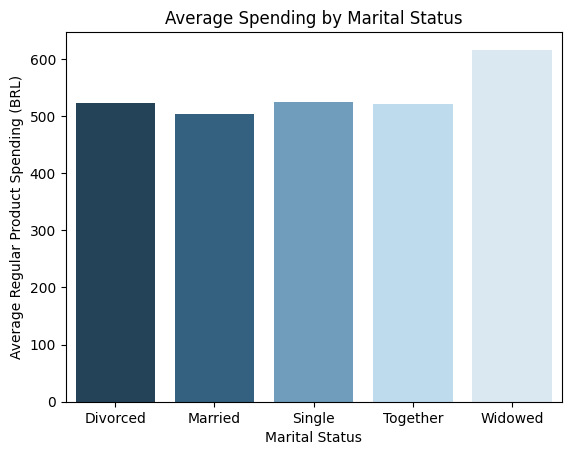

In [ ]:
sns.barplot(data = marital_regularprods, x='marital_status', y='AmtRegularProds', hue=marital_status)
plt.title("Average Spending by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Average Regular Product Spending (BRL)")

# Create a bar chart displaying the average spending on regular products by marital status.

In [ ]:
groups = [ifood_3[ifood_3['marital_status'] == status]['AmtRegularProds'] for status in ifood_3['marital_status'].unique()]
anova_stat, anova_p = stats.f_oneway(*groups)
anova_stat, anova_p

# Execute one-way ANOVA to see if at least one group mean is significantly different than the others.

(np.float64(0.7691247242068486), np.float64(0.5452303578147373))

## Analyzing Spending by Education Level

---



In [ ]:
education_level = ['Basic', 'Graduated', '2nCycle', 'Masters', 'PhD']

def get_education_level(row):
    for col in education_level:
        if row[col] == 1:
            return col
    return 'Unknown'

ifood_3['education_level'] = ifood_3.apply(get_education_level, axis=1)

# Create a column labeled 'education_level' that returns the text value of each respondent's education level.

order = ['Basic', '2nCycle', 'Graduated', 'Masters', 'PhD']

ifood_3['education_level'] = pd.Categorical(
    ifood_3['education_level'],
    categories=order,
    ordered=True
)

# Set display order in respect to education level

In [ ]:
ifood_3['education_level']

,education_level
0,Graduated
1,Graduated
2,Graduated
3,Graduated
4,PhD
...,...
2200,Graduated
2201,PhD
2202,Graduated
2203,Masters


In [ ]:
education_regularprods = ifood_3.groupby('education_level', as_index = False, observed = False)['AmtRegularProds'].mean()
education_regularprods

# Create a DataFrame labeled 'education_regularprods' that shows the average spending on regular products for each education level.

,education_level,AmtRegularProds
0,Basic,36.129630
1,2nCycle,405.055556
2,Graduated,520.131177
3,Masters,530.725275
4,PhD,608.210084


Text(0, 0.5, 'Average Regular Product Spending (BRL)')

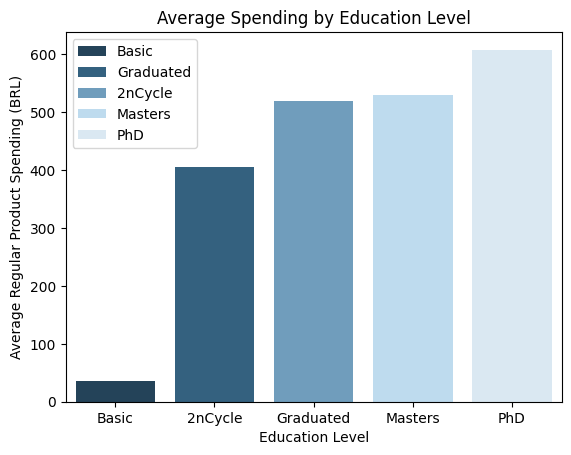

In [ ]:
sns.barplot(data = education_regularprods, x='education_level', y='AmtRegularProds', hue=education_level)
plt.title("Average Spending by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Regular Product Spending (BRL)")

# Create a bar chart displaying the average spending on regular products by education level.

In [ ]:
groups = [ifood_3[ifood_3['education_level'] == status]['AmtRegularProds'] for status in ifood_3['education_level'].unique()]
anova_stat, anova_p = stats.f_oneway(*groups)
anova_stat, anova_p

# Execute one-way ANOVA to see if at least one group mean is significantly different than the others.

(np.float64(15.904836808369645), np.float64(7.67742847568462e-13))

## Analyzing Spending by Household Income Levels

---



In [ ]:
householdincome_regularprods = ifood_3.groupby('Household_Income', as_index = False)['AmtRegularProds'].mean()
householdincome_regularprods

# Create a DataFrame labeled 'householdincome_regularprods' that shows respondents' income and average spending on regular products.

,Household_Income,AmtRegularProds
0,1730.0,6.0
1,2447.0,1728.0
2,3502.0,3.0
3,4023.0,7.0
4,4428.0,-283.0
...,...,...
1958,101970.0,799.0
1959,102160.0,1124.0
1960,102692.0,816.0
1961,105471.0,1310.0


Text(0, 0.5, 'Average Regular Product Spending (BRL)')

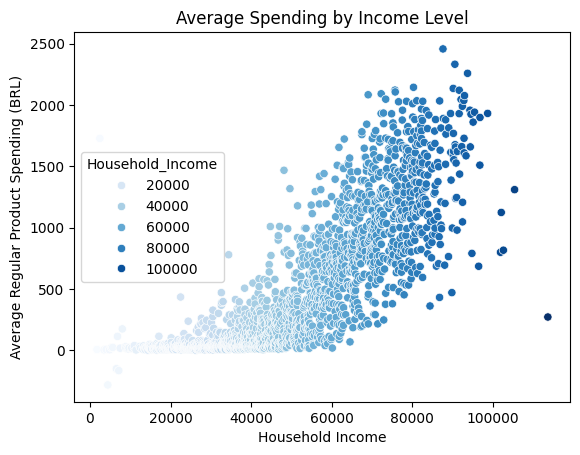

In [ ]:
sns.scatterplot(data = householdincome_regularprods, x='Household_Income', y='AmtRegularProds', hue='Household_Income', palette='Blues')
plt.title("Average Spending by Income Level")
plt.xlabel("Household Income")
plt.ylabel("Average Regular Product Spending (BRL)")

# Create a scatterplot to visualize the relationship between income and average spending on regular products.

In [ ]:
X = ifood_3['Household_Income']
y = ifood_3['AmtRegularProds']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

# Conduct a correlation analysis to measure the strength and direction of the relationship between income and average spending on regular products.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        AmtRegularProds   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     4418.
Date:                Sun, 08 Feb 2026   Prob (F-statistic):               0.00
Time:                        01:11:19   Log-Likelihood:                -15844.
No. Observations:                2205   AIC:                         3.169e+04
Df Residuals:                    2203   BIC:                         3.170e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -608.8512     18.277    -33.312      0.000    -644.693    -573.009
Household_Income     0.0218      0.000     66.471      0.000       0.021       0.022
==============================================================================
Omnibus:                      199.649   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              399.656
Skew:                           0.589   Prob(JB):                     1.64e-87
Kurtosis:                       4.721   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Analyzing Campaign 1 Acceptance Rates by Marital Status and Education Level


---



In [ ]:
marital_campaign1 = ifood_3.groupby('marital_status', as_index = False)['AcceptedCmp1'].sum()
marital_campaign1

# Create a DataFrame labeled 'marital_campaign1' that shows the total number of respondents who accepted campaign 1 by marital status.

,marital_status,AcceptedCmp1
0,Divorced,12
1,Married,62
2,Single,31
3,Together,32
4,Widowed,5


Text(0, 0.5, 'Campaign 1 Acceptances (Count)')

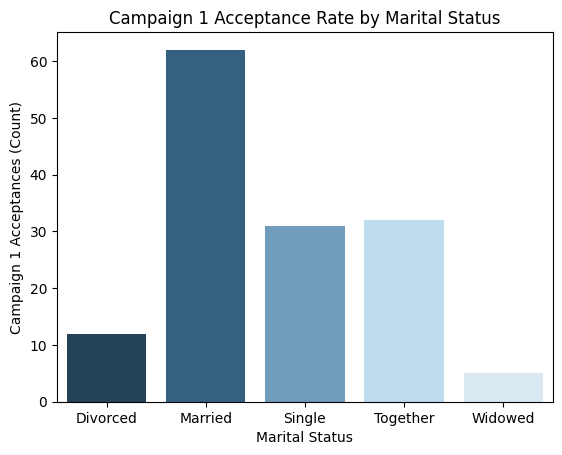

In [ ]:
sns.barplot(data = marital_campaign1, x='marital_status', y='AcceptedCmp1', hue=marital_status)
plt.title("Campaign 1 Acceptance Rate by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Campaign 1 Acceptances (Count)")

# Create a bar chart displaying the effectiveness of campaign 1 by marital status.

In [ ]:
groups = [ifood_3[ifood_3['marital_status'] == status]['AcceptedCmp1'] for status in ifood_3['marital_status'].unique()]
anova_stat, anova_p = stats.f_oneway(*groups)
anova_stat, anova_p

# Execute one-way ANOVA to see if at least one group mean is significantly different than the others.

(np.float64(0.5346665954543273), np.float64(0.7102847552615352))

In [ ]:
education_campaign1 = ifood_3.groupby('education_level', as_index = False)['AcceptedCmp1'].sum()
education_campaign1

# Create a DataFrame labeled 'education_campaign1' that shows the total number of respondents who accepted campaign 1 by education level.

/tmp/ipython-input-754571013.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_campaign1 = ifood_3.groupby('education_level', as_index = False)['AcceptedCmp1'].sum()


,education_level,AcceptedCmp1
0,Basic,0
1,2nCycle,14
2,Graduated,80
3,Masters,18
4,PhD,30


Text(0, 0.5, 'Campaign 1 Acceptances (Count)')

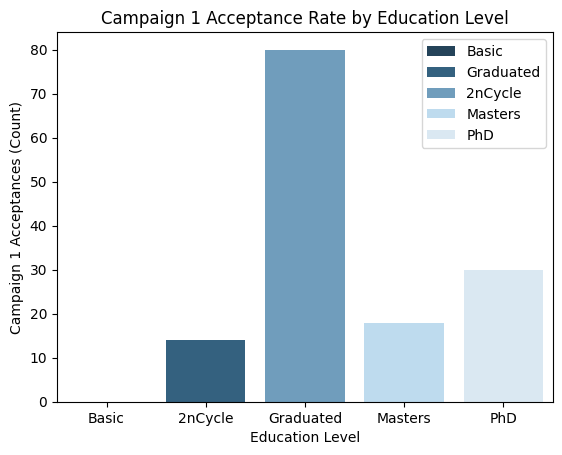

In [ ]:
sns.barplot(data = education_campaign1, x='education_level', y='AcceptedCmp1', hue=education_level)
plt.title("Campaign 1 Acceptance Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Campaign 1 Acceptances (Count)")

# Create a bar chart displaying the effectiveness of campaign 1 by education level.

In [ ]:
groups = [ifood_3[ifood_3['education_level'] == status]['AcceptedCmp1'] for status in ifood_3['education_level'].unique()]
anova_stat, anova_p = stats.f_oneway(*groups)
anova_stat, anova_p

# Execute one-way ANOVA to see if at least one group mean is significantly different than the others.

(np.float64(1.5623246962996797), np.float64(0.18170206330534386))

## Analyzing Campaign 2 Acceptance Rates by Marital Status and Education Level

In [ ]:
marital_campaign2 = ifood_3.groupby('marital_status', as_index = False)['AcceptedCmp2'].sum()
marital_campaign2

# Create a DataFrame labeled 'marital_campaign2' that shows the total number of respondents who accepted campaign 2 by marital status.

,marital_status,AcceptedCmp2
0,Divorced,5
1,Married,7
2,Single,5
3,Together,12
4,Widowed,1


Text(0, 0.5, 'Campaign 2 Acceptances (Count)')

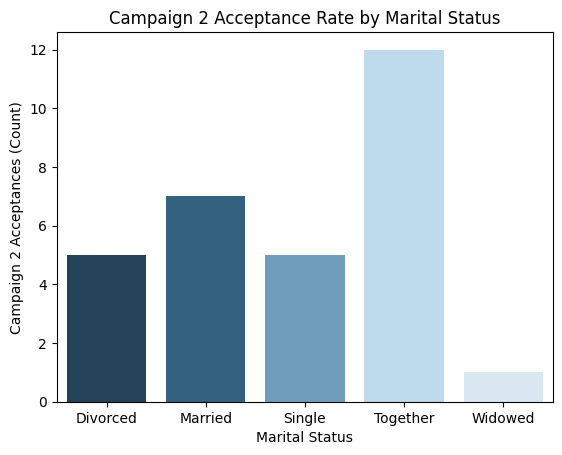

In [ ]:
sns.barplot(data = marital_campaign2, x='marital_status', y='AcceptedCmp2', hue=marital_status)
plt.title("Campaign 2 Acceptance Rate by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Campaign 2 Acceptances (Count)")

# Create a bar chart displaying the effectiveness of campaign 1 by marital status.

In [ ]:
groups = [ifood_3[ifood_3['marital_status'] == status]['AcceptedCmp2'] for status in ifood_3['marital_status'].unique()]
anova_stat, anova_p = stats.f_oneway(*groups)
anova_stat, anova_p

# Execute one-way ANOVA to see if at least one group mean is significantly different than the others.

(np.float64(1.4348595900467545), np.float64(0.21986711828308309))

In [ ]:
education_campaign2 = ifood_3.groupby('education_level', as_index = False)['AcceptedCmp2'].sum()
education_campaign2

# Create a DataFrame labeled 'education_campaign2' that shows the total number of respondents who accepted campaign 2 by education level.

/tmp/ipython-input-2790895557.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_campaign2 = ifood_3.groupby('education_level', as_index = False)['AcceptedCmp2'].sum()


,education_level,AcceptedCmp2
0,Basic,0
1,2nCycle,2
2,Graduated,16
3,Masters,2
4,PhD,10


Text(0, 0.5, 'Campaign 2 Acceptances (Count)')

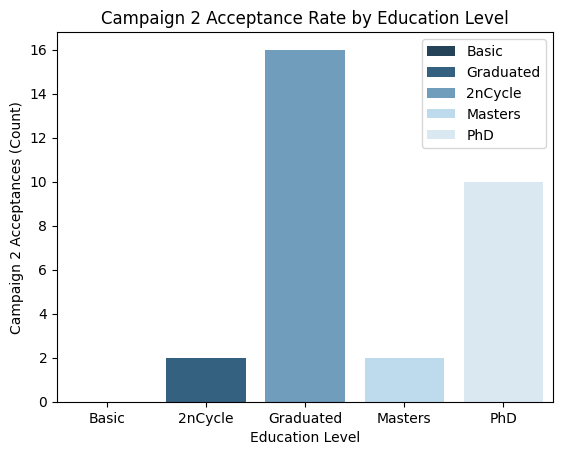

In [ ]:
sns.barplot(data = education_campaign2, x='education_level', y='AcceptedCmp2', hue=education_level)
plt.title("Campaign 2 Acceptance Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Campaign 2 Acceptances (Count)")

# Create a bar chart displaying the effectiveness of campaign 2 by education level.

In [ ]:
groups = [ifood_3[ifood_3['education_level'] == status]['AcceptedCmp2'] for status in ifood_3['education_level'].unique()]
anova_stat, anova_p = stats.f_oneway(*groups)
anova_stat, anova_p

# Execute one-way ANOVA to see if at least one group mean is significantly different than the others.

(np.float64(1.1756837439734307), np.float64(0.31950347027507214))

## Analyzing Campaign 3 Acceptance Rates by Marital Status and Education Level

---



In [ ]:
marital_campaign3 = ifood_3.groupby('marital_status', as_index = False)['AcceptedCmp3'].sum()
marital_campaign3

# Create a DataFrame labeled 'marital_campaign3' that shows the total number of respondents who accepted campaign 3 by marital status.

,marital_status,AcceptedCmp3
0,Divorced,20
1,Married,63
2,Single,39
3,Together,37
4,Widowed,4


Text(0, 0.5, 'Campaign 3 Acceptances (Count)')

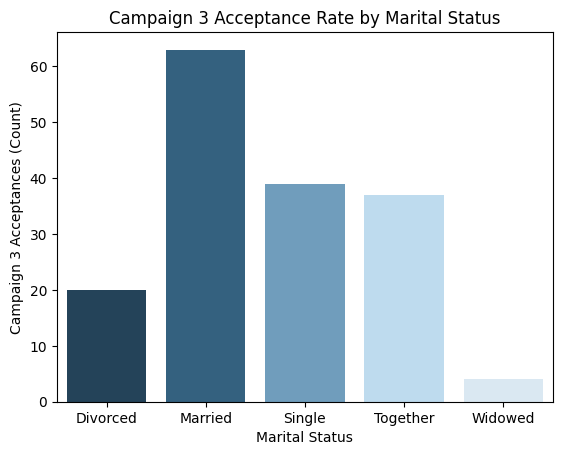

In [ ]:
sns.barplot(data = marital_campaign3, x='marital_status', y='AcceptedCmp3', hue=marital_status)
plt.title("Campaign 3 Acceptance Rate by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Campaign 3 Acceptances (Count)")

# Create a bar chart displaying the effectiveness of campaign 3 by marital status.

In [ ]:
groups = [ifood_3[ifood_3['marital_status'] == status]['AcceptedCmp3'] for status in ifood_3['marital_status'].unique()]
anova_stat, anova_p = stats.f_oneway(*groups)
anova_stat, anova_p

# Execute one-way ANOVA to see if at least one group mean is significantly different than the others.

(np.float64(0.5348689323283561), np.float64(0.7101363042894827))

In [ ]:
education_campaign3 = ifood_3.groupby('education_level', as_index = False)['AcceptedCmp3'].sum()
education_campaign3

# Create a DataFrame labeled 'education_campaign3' that shows the total number of respondents who accepted campaign 3 by education level.

/tmp/ipython-input-62448622.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_campaign3 = ifood_3.groupby('education_level', as_index = False)['AcceptedCmp3'].sum()


,education_level,AcceptedCmp3
0,Basic,6
1,2nCycle,15
2,Graduated,78
3,Masters,24
4,PhD,40


Text(0, 0.5, 'Campaign 3 Acceptances (Count)')

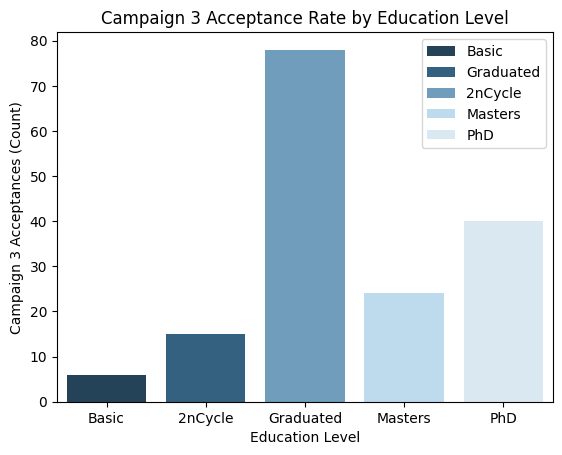

In [ ]:
sns.barplot(data = education_campaign3, x='education_level', y='AcceptedCmp3', hue=education_level)
plt.title("Campaign 3 Acceptance Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Campaign 3 Acceptances (Count)")

# Create a bar chart displaying the effectiveness of campaign 3 by education level.

In [ ]:
groups = [ifood_3[ifood_3['education_level'] == status]['AcceptedCmp3'] for status in ifood_3['education_level'].unique()]
anova_stat, anova_p = stats.f_oneway(*groups)
anova_stat, anova_p

# Execute one-way ANOVA to see if at least one group mean is significantly different than the others.

(np.float64(0.596979092313273), np.float64(0.6648501514670581))

## Analyzing Campaign 4 Acceptance Rates by Marital Status and Education Level

---



In [ ]:
marital_campaign4 = ifood_3.groupby('marital_status', as_index = False)['AcceptedCmp4'].sum()
marital_campaign4

# Create a DataFrame labeled 'marital_campaign4' that shows the total number of respondents who accepted campaign 4 by marital status.

,marital_status,AcceptedCmp4
0,Divorced,18
1,Married,62
2,Single,32
3,Together,42
4,Widowed,10


Text(0, 0.5, 'Campaign 4 Acceptances (Count)')

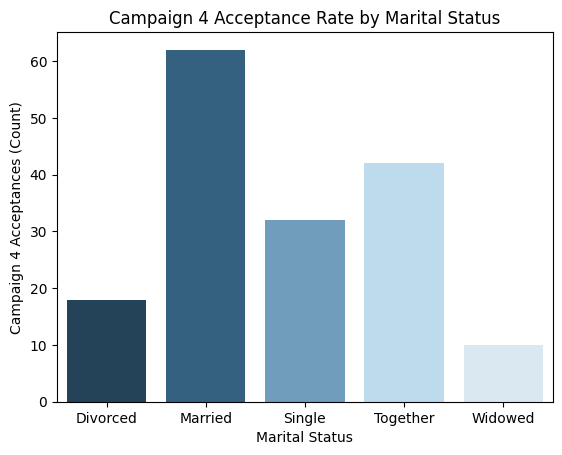

In [ ]:
sns.barplot(data = marital_campaign4, x='marital_status', y='AcceptedCmp4', hue=marital_status)
plt.title("Campaign 4 Acceptance Rate by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Campaign 4 Acceptances (Count)")

# Create a bar chart displaying the effectiveness of campaign 4 by marital status.

In [ ]:
groups = [ifood_3[ifood_3['marital_status'] == status]['AcceptedCmp4'] for status in ifood_3['marital_status'].unique()]
anova_stat, anova_p = stats.f_oneway(*groups)
anova_stat, anova_p

# Execute one-way ANOVA to see if at least one group mean is significantly different than the others.

(np.float64(1.0174722732423291), np.float64(0.39688436380297915))

In [ ]:
education_campaign4 = ifood_3.groupby('education_level', as_index = False)['AcceptedCmp4'].sum()
education_campaign4

# Create a DataFrame labeled 'education_campaign1' that shows the total number of respondents who accepted campaign 4 by education level.

/tmp/ipython-input-2672040229.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_campaign4 = ifood_3.groupby('education_level', as_index = False)['AcceptedCmp4'].sum()


,education_level,AcceptedCmp4
0,Basic,0
1,2nCycle,9
2,Graduated,79
3,Masters,31
4,PhD,45


Text(0, 0.5, 'Campaign 4 Acceptances (Count)')

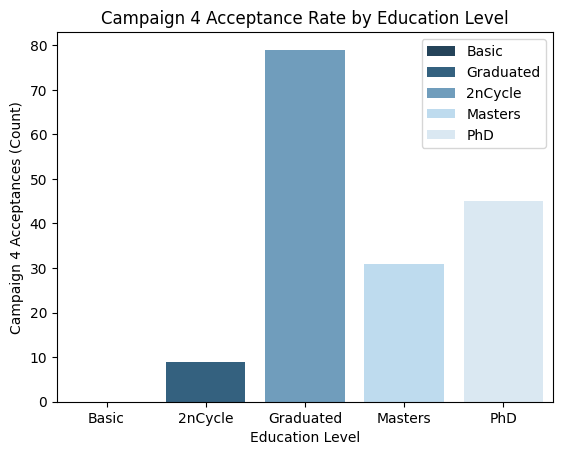

In [ ]:
sns.barplot(data = education_campaign4, x='education_level', y='AcceptedCmp4', hue=education_level)
plt.title("Campaign 4 Acceptance Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Campaign 4 Acceptances (Count)")

# Create a bar chart displaying the effectiveness of campaign 4 by education level.

In [ ]:
groups = [ifood_3[ifood_3['education_level'] == status]['AcceptedCmp4'] for status in ifood_3['education_level'].unique()]
anova_stat, anova_p = stats.f_oneway(*groups)
anova_stat, anova_p

# Execute one-way ANOVA to see if at least one group mean is significantly different than the others.

(np.float64(2.5956227373539122), np.float64(0.03474066789006892))

## Analyzing Campaign 5 Acceptance Rates by Marital Status and Education Level

---



In [ ]:
marital_campaign5 = ifood_3.groupby('marital_status', as_index = False)['AcceptedCmp5'].sum()
marital_campaign5

# Create a DataFrame labeled 'marital_campaign5' that shows the total number of respondents who accepted campaign 5 by marital status.

,marital_status,AcceptedCmp5
0,Divorced,13
1,Married,66
2,Single,32
3,Together,43
4,Widowed,7


Text(0, 0.5, 'Campaign 5 Acceptances (Count)')

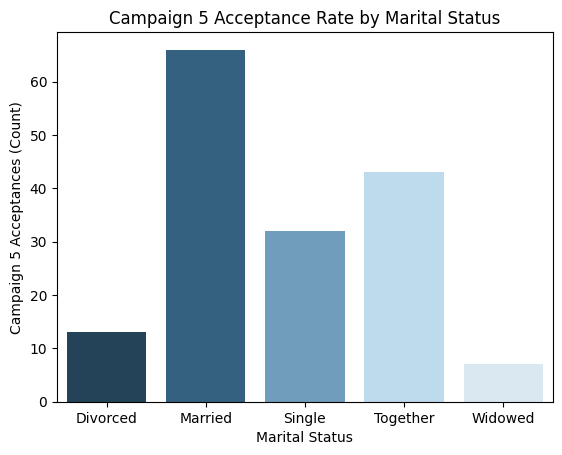

In [ ]:
sns.barplot(data = marital_campaign5, x='marital_status', y='AcceptedCmp5', hue=marital_status)
plt.title("Campaign 5 Acceptance Rate by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Campaign 5 Acceptances (Count)")

# Create a bar chart displaying the effectiveness of campaign 5 by marital status.

In [ ]:
groups = [ifood_3[ifood_3['marital_status'] == status]['AcceptedCmp5'] for status in ifood_3['marital_status'].unique()]
anova_stat, anova_p = stats.f_oneway(*groups)
anova_stat, anova_p

# Execute one-way ANOVA to see if at least one group mean is significantly different than the others.

(np.float64(0.4673104245882012), np.float64(0.7597826571658962))

In [ ]:
education_campaign5 = ifood_3.groupby('education_level', as_index = False)['AcceptedCmp5'].sum()
education_campaign5

# Create a DataFrame labeled 'education_campaign5' that shows the total number of respondents who accepted campaign 5 by education level.

/tmp/ipython-input-2056984259.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_campaign5 = ifood_3.groupby('education_level', as_index = False)['AcceptedCmp5'].sum()


,education_level,AcceptedCmp5
0,Basic,0
1,2nCycle,10
2,Graduated,86
3,Masters,27
4,PhD,38


Text(0, 0.5, 'Campaign 5 Acceptances (Count)')

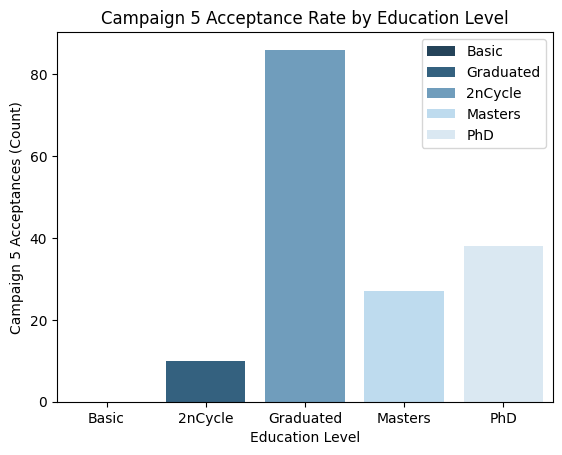

In [ ]:
sns.barplot(data = education_campaign5, x='education_level', y='AcceptedCmp5', hue=education_level)
plt.title("Campaign 5 Acceptance Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Campaign 5 Acceptances (Count)")

# Create a bar chart displaying the effectiveness of campaign 5 by education level.

In [ ]:
groups = [ifood_3[ifood_3['education_level'] == status]['AcceptedCmp5'] for status in ifood_3['education_level'].unique()]
anova_stat, anova_p = stats.f_oneway(*groups)
anova_stat, anova_p

# Execute one-way ANOVA to see if at least one group mean is significantly different than the others.

(np.float64(1.5927819567586776), np.float64(0.17351020877312565))